### Types of ML
There are several different type of machine learning. The easiest two understand as a beginner are:
1. supervised
    - data is labelled.
2. unsupervised
    - data is unlabelled.

### Data
All types of machine learning require data. That data is a numerical vector. **EVERYTHING** in ML are vectors/matrices. Inputs, outputs, weights, scores, gradients, losses, etc
* If the neural network is operating on images of handwitten digits which are of the size 28 x 28, then the input vector will be a single 784 length vector whose elements represent how dark each pixel is.
* If the neural network is operating on 8 movie scores, then the input vector is an 8 length input vector where each element is the rating of one movie

The more data you have, the better your NN will perform. Usually.
* The more examples of images of numbers you have, the better your NN will do.
* The more complex each training example is, the more likely you will overfit your NN to the training data.
    * Intuitively, if the data is unecessarily complex then the NN will make assumptions based on those properties that it shouldn't. If my images of handwritten digits also contain color, and 60% of the images of '4' are blue, then our NN will assume that the more blue an image is, the more likely it is a '4'
    * More complex data also means larger input vectors. If an image is 28 x 28 and there are 3 colors, then the input vector is of size 28 \* 28 \* 3. **The larger your input vector, the more likely you will overfit your data**. (**The more complex your data, the more likely you will overfit your data**.)
    
    #### What is overfitting
    An overfit neural network is one which does very well classifying data it was trained on, but does poorly on new data.  
        * If our NN can classify with 99% accuracy an element of our training data set, but only performs with an accuracy of 50% on an image it has never seen, then our NN is overfit.
        ##### How to prevent overfitting
        We split our data set into two groups.
        1. Training
            * We train on this set (obviously). If our NN mistakes a '4' for an '8', then we change our NN to better classify this '4'.
        2. Testing
            * We **never** train on this set. If our NN mistakes a '4' for an '8', then we store that it got it wrong, and use this tally to calculate how well our NN did.
            * As we train our NN, we will test that our scores for the testing set are not going down. The testing scores going down signifies that we are overfitting.


In [51]:
v = [1,2,3]
m = [[1,2,3],
     [4,5,6],
     [7,8,9]]

print(v)
print(m)

[1, 2, 3]
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


Download the MNIST training set and testing set from [here](https://pjreddie.com/projects/mnist-in-csv/), and put the .csv in the same directory as this notebook.  
The MNIST dataset contains examples of handwritten digits.

In [52]:
training_data_file_ref = open("./mnist_train.csv", 'r')
training_data_set = training_data_file_ref.readlines();
training_data_file_ref.close();

testing_data_file_ref = open("./mnist_test.csv", 'r')
testing_data_set = testing_data_file_ref.readlines();
testing_data_file_ref.close();

In [53]:
training_example = training_data_set[0]
print("There are", len(training_data_set), "images")
print(training_example)

There are 60000 images
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,

Any element of the training_data_set array is a 785 length array, where the 0th element is the label and the other 784 elements are a flattened image of a handwritten digit.

5


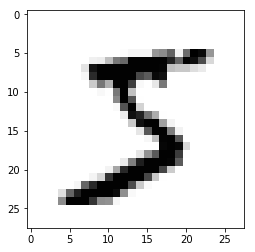

(28, 28)


In [54]:
import matplotlib.pyplot as plt
import numpy as np

training_example = training_example.split(',') #Split this huge string on commas.
label = training_example[0] #The first element is the label
training_example = np.asfarray(training_example[1:]).reshape((28,28)) #convert it to an array of floats of size 28 x 28

print(label)
plt.imshow(training_example, cmap='Greys')
plt.show()
print(training_example.shape)

Let's break down what our data set is:
* A file containing 60,000 lines
    * each line is a string
        * each string is one training example, 785 characters long
            * the first element of each training example is a label ('5', or '8', or some other label)
                * the rest of the of the training example is a vector 784 characters long
                     * each element of the vector represents the intensity of one pixel of a 28 x 28 image

## Neural Networks
A NN is a pattern recognition device. A NN is used when the pattern being recognized is too complex to accomplish with traditional algorithms.
* It trivial to recognize that 101 is 5 in binary. A NN is not necessary for this task.
* It is simple to recognize a single image of a '5' and differentiate it from other numbers. A NN is not necessary for this task.
* It is next to impossible to recognize thousands of images of '5's, and differentiate them from thousands of images of other numbers. A NN **is** necessary for this task.

The output of the NN will be a vector representation of the "confidence" that the NN thinks an image matches the labels.
* A NN which is 100% confident that it was given an image of '0' will output [1,0,0,0,0,0,0,0,0,0].
* A NN which is 100% confident that it was given an image of '4' will output [0,0,0,0,1,0,0,0,0,0].
* A NN which is 60% confident that it was given an image of '8', and 30% confident it was given an image of '1', and 10% confident that it was given an image of '3' will output [0, .3, 0, .1, 0, 0, 0, 0, .6, 0] 

**The output of a NN is a matrix of confidence scores.**

### A single Neuron

A NN is a directed graph of neurons. A neuron is a node which has n inputs, 1 output, and some activation function.  
All n inputs come into the neuron. Each input is weighted by some quantity, w1, ..., wn.  The weighted sum is calculated and passed to some activation function. The output of the activation function is the output of the neuron.
![Single Neuron](imgs\neuron_1.jpg)

A 'vanilla' NN has 3 layers of neurons. The **input layer**, the **hidden layer**, and the **output layer**. Every neuron of the input layer is connected to every node of the hidden layer. Every node of the hidden layer is connected to every node of the output layer.

![Artificial Neural Network](imgs\ANN_1.png)

#### How it all relates to matrices (optional)
The weights can be represented as a matrix of weights  
[w11, w21, w31]  
[w12, w22, w32]  
[w13, w23, w33]  
where each wij is the weight from the ith node in the previous layer to the jth node in the current layer.  
If we multiply this weight matrix by the output of the previous layer, then apply the activation function to the resulting vector, we will have the output of the current layer.

In [5]:
w = np.matrix([[.2,.6,.3],[.4,.7,.9],[.2,.3,.8]]) # The weights from the previous layer to the current layer
i = np.matrix([.1,.8,.3]).T                 # The output of the previous layer, aka the input of the current layer
o = w.dot(i)                                 # The product of these two matrices
print(o)

[[ 0.59]
 [ 0.87]
 [ 0.5 ]]


### Activation Function
The choice of activation function is very important. To mimick the way a neuron in the brain functions, we need something which is asymptotically limited to be between 0 and 1 for all inputs, and which will very quickly 'self-correct'. We will use the sigmoid function, which looks like this: 
![sigmoid function graph](imgs\sigmoid.png)

In [6]:
from scipy.special import expit
activated_o = expit(o)
print(activated_o)

[[ 0.64336515]
 [ 0.7047457 ]
 [ 0.62245933]]


The activated_o is the final outut of this fake layer. This column vector would then be passed as input to the next layer where the process repeats.

The number of inputs and outputs of a NN is evident in the problem. One of our images is a 784 length vector, therefore our NN will have 784 input neurons. The output of our NN is the classification of the image, i.e. '0', '1', ... '8', '9'.

## NN from scratch

In [7]:
class NeuralNetwork:
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        self.input_to_hidden_weights = np.random.normal(0.0, pow(self.hidden_nodes, -0.5), (self.hidden_nodes, self.input_nodes))
        self.hidden_to_output_weights = np.random.normal(0.0, pow(self.output_nodes, -0.5), (self.output_nodes, self.hidden_nodes))
    
    def activate(self, x):
        return expit(x)
    
    def query(self, input_list):
        #convert input_list into a 2d array
        input = np.array(input_list, ndmin=2).T
        
        hidden_input_signal = np.dot(self.input_to_hidden_weights, input)
        hidden_output_signal = self.activate(hidden_input_signal)
        output_input_signal = np.dot(self.hidden_to_output_weights, hidden_output_signal)
        output_output_signal = self.activate(output_input_signal);
        
        return output_output_signal
        
    def shape(self):
        return [self.input_nodes, self.hidden_nodes, self.output_nodes];

In [8]:
num_input = 784
num_hidden = 100
num_output = 10

NN = NeuralNetwork(num_input, num_hidden, num_output);


training_example = np.asfarray(training_data_set[0].split(',')[1:])
print("correct answer: ", training_data_set[0][0])
print(NN.query(training_example))

correct answer:  5
[[ 0.0023625 ]
 [ 0.05248763]
 [ 0.32015631]
 [ 0.14373562]
 [ 0.73034544]
 [ 0.73470512]
 [ 0.1500492 ]
 [ 0.81201532]
 [ 0.1236991 ]
 [ 0.98264315]]


Our NN has given a score! It is entirely completely wrong, and isn't normalized to be percentages, but it queried and that's all that really matters. Our NN is so far entirely untrained.

### Training
Training a NN is it's own art, philosophy, field of science and religion. I will give the basics.

We must calculate how wrong we were.
* The correct classification for '5' is [0,0,0,0,0,1,0,0,0,0], but our NN was entirely wrong. It gave the above vector. We must calculate the distance between these vectors. This distance however only tells us how incorrect the final output layer was, it tells us nothing about the hidden layer and the weights to it.
    * We use **gradient descent** to attribute the responsibility of the final scores to each weight in the network
        * If a weight is very high, like .8, and our output is very wrong, then we need to change the weight .8 much more than a very small weight.
    * Once we have attributed responsibilit to certain weights, we perform **back propagation** to go backwards through the network and update the weights

In [9]:
class NeuralNetwork2:
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        self.learning_rate = learning_rate
        
        self.input_to_hidden_weights = np.random.normal(0.0, pow(self.hidden_nodes, -0.5), (self.hidden_nodes, self.input_nodes))
        self.hidden_to_output_weights = np.random.normal(0.0, pow(self.output_nodes, -0.5), (self.output_nodes, self.hidden_nodes))
    
    def activate(self, x):
        return expit(x)

    def train(self, input_list, target_list):
        #convert input_list into a 2d array
        input = np.array(input_list, ndmin=2).T
        #convert target_list into a 2d array
        target = np.array(target_list, ndmin=2).T
        
        #calculate signals in and out of hidden layers
        hidden_input_signal = np.dot(self.input_to_hidden_weights, input)
        hidden_output_signal = self.activate(hidden_input_signal)
        
        
        output_input_signal = np.dot(self.hidden_to_output_weights, hidden_output_signal)
        output_output_signal = self.activate(output_input_signal);
        
        output_error = target - output_output_signal
        
        hidden_error = np.dot(self.hidden_to_output_weights.T, output_error)
        
        self.hidden_to_output_weights += self.learning_rate * np.dot((output_error * output_output_signal * (1.0 - output_output_signal)), np.transpose(hidden_output_signal))
        self.input_to_hidden_weights += self.learning_rate * np.dot((hidden_error * hidden_output_signal * (1-hidden_output_signal)), np.transpose(input))
    
    
    def query(self, input_list):
        #convert input_list into a 2d array
        input = np.array(input_list, ndmin=2).T
        
        hidden_input_signal = np.dot(self.input_to_hidden_weights, input)
        hidden_output_signal = self.activate(hidden_input_signal)
        output_input_signal = np.dot(self.hidden_to_output_weights, hidden_output_signal)
        output_output_signal = self.activate(output_input_signal);
        
        return output_output_signal
        
    def shape(self):
        return [self.input_nodes, self.hidden_nodes, self.output_nodes];

In [42]:
epochs = 2

num_input = 784
num_hidden = 100
num_output = 10
learning_rate = 0.03

NN = NeuralNetwork2(num_input, num_hidden, num_output, learning_rate);
for epoch in range(epochs):
    print("epoch: ", epoch)
    for example in training_data_set:
        label = np.zeros(10) + 0.01
        label[int(example[0])] = .99
        training_example = np.asfarray(example.split(',')[1:])
        training_example /= 255.
        training_example *= .99
        training_example += 0.01
        NN.train(training_example, label)
idx = 0
for example in testing_data_set:
    label = np.zeros(10) + 0.01
    label[int(example[0])] = .99
    testing_example = np.asfarray(example.split(',')[1:])
    testing_example /= 255.
    testing_example *= .99
    testing_example += 0.01
    if(np.argmax(NN.query(testing_example)) != int(example[0])) :
        print("correct: ", example[0], "| estimated: ", np.argmax(NN.query(testing_example)), "idx: ", idx)
    idx += 1


epoch:  0
epoch:  1
correct:  5 | estimated:  6 idx:  8
correct:  7 | estimated:  1 idx:  111
correct:  7 | estimated:  4 idx:  124
correct:  2 | estimated:  9 idx:  149
correct:  4 | estimated:  2 idx:  247
correct:  8 | estimated:  1 idx:  257
correct:  6 | estimated:  0 idx:  259
correct:  8 | estimated:  4 idx:  290
correct:  4 | estimated:  6 idx:  300
correct:  9 | estimated:  7 idx:  320
correct:  2 | estimated:  7 idx:  321
correct:  5 | estimated:  3 idx:  340
correct:  5 | estimated:  0 idx:  352
correct:  2 | estimated:  7 idx:  362
correct:  3 | estimated:  7 idx:  381
correct:  2 | estimated:  8 idx:  444
correct:  6 | estimated:  0 idx:  445
correct:  9 | estimated:  3 idx:  479
correct:  8 | estimated:  0 idx:  495
correct:  8 | estimated:  3 idx:  543
correct:  7 | estimated:  1 idx:  551
correct:  4 | estimated:  9 idx:  565
correct:  3 | estimated:  8 idx:  578
correct:  8 | estimated:  1 idx:  582
correct:  8 | estimated:  3 idx:  591
correct:  7 | estimated:  9 idx:

correct:  2 | estimated:  3 idx:  3876
correct:  5 | estimated:  6 idx:  3893
correct:  5 | estimated:  3 idx:  3902
correct:  1 | estimated:  3 idx:  3906
correct:  9 | estimated:  3 idx:  3926
correct:  4 | estimated:  6 idx:  3941
correct:  3 | estimated:  5 idx:  3943
correct:  2 | estimated:  8 idx:  3946
correct:  7 | estimated:  1 idx:  3976
correct:  7 | estimated:  6 idx:  4007
correct:  6 | estimated:  5 idx:  4063
correct:  0 | estimated:  6 idx:  4065
correct:  8 | estimated:  3 idx:  4068
correct:  8 | estimated:  0 idx:  4075
correct:  9 | estimated:  3 idx:  4078
correct:  9 | estimated:  4 idx:  4093
correct:  5 | estimated:  1 idx:  4131
correct:  8 | estimated:  2 idx:  4140
correct:  5 | estimated:  1 idx:  4152
correct:  9 | estimated:  4 idx:  4154
correct:  8 | estimated:  3 idx:  4159
correct:  9 | estimated:  0 idx:  4163
correct:  2 | estimated:  6 idx:  4176
correct:  7 | estimated:  9 idx:  4199
correct:  2 | estimated:  3 idx:  4205
correct:  6 | estimated: 

correct answer:  4
estimated:  6


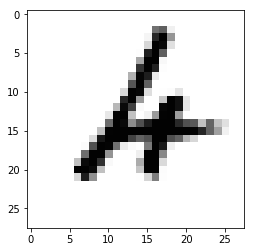

In [50]:
testing_example = np.asfarray(testing_data_set[1549].split(',')[1:])
print("correct answer: ", testing_data_set[1549][0])
print("estimated: ", np.argmax(NN.query(testing_example)))
plt.imshow(testing_example.reshape(28,28), cmap="Greys")
plt.show()